In [1]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

In [ ]:
# 층의 정보
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [6]:
conv = model.layers[0]
print(conv.weights[0].shape) # 가중치
print(conv.weights[1].shape) # 절편

(3, 3, 1, 32)
(32,)


In [7]:
# 가중치의 평균, 표준편차
conv_weights = conv.weights[0].numpy()
print('평균:', conv_weights.mean(), conv_weights.std())

평균: -0.0128493095 0.23581943


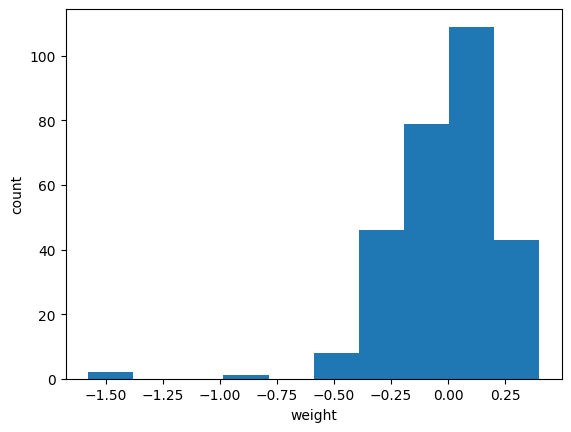

In [8]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

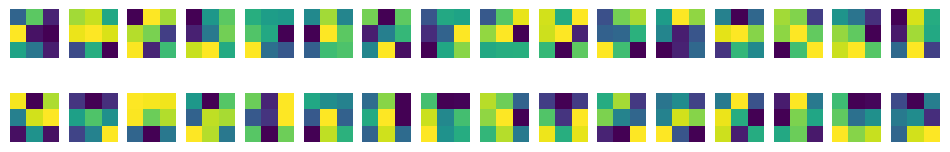

In [24]:
# 가중치 시각화
_, axs = plt.subplots(2, 16, figsize=(12,2))
for i in range(2): # 0, 1
    for j in range(16):
        cols = i * 16 + j
        axs[i, j].imshow(conv_weights[:,:,0, cols])
        axs[i, j].axis('off')

plt.show()

In [21]:
# 학습하지 않은 빈 모델
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28, 28, 1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))

In [22]:
no_training_conv = no_training_model.layers[0]

no_training_weights = no_training_conv.weights[0].numpy()
print('평균:', no_training_weights.mean(), "표준편차:", no_training_weights.std())

평균: 0.0030109389 표준편차: 0.08125713


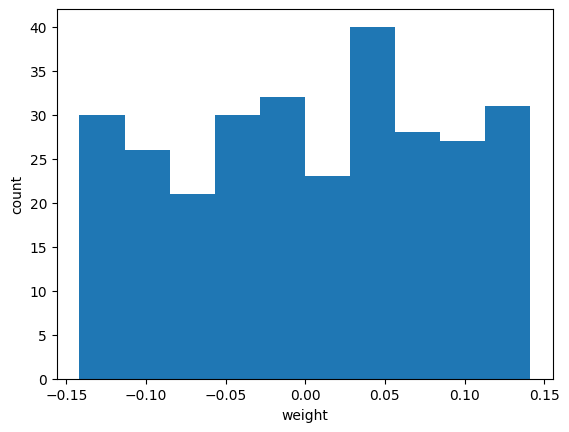

In [23]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

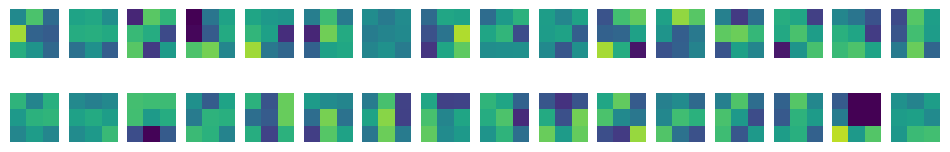

In [25]:
# 가중치 시각화
_, axs = plt.subplots(2, 16, figsize=(12,2))
for i in range(2): # 0, 1
    for j in range(16):
        cols = i * 16 + j
        axs[i, j].imshow(conv_weights[:,:,0, cols], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [26]:
# 특성맵 시각화
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [28]:
# 패선 MNIST 데이터
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

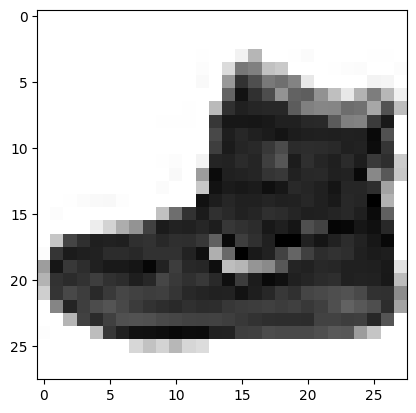

In [29]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [37]:
# model.inputs[0]
conv_fm1 = keras.Model(model.inputs[0], model.layers[0].output)

In [39]:
# 학습한 첫 번째 특성맵을 확인하려면 predict 메서드로 출력 결과를 확인(.., 28, 28, 1, 32)
ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_fm1.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


In [40]:
feature_maps.shape

(1, 28, 28, 32)

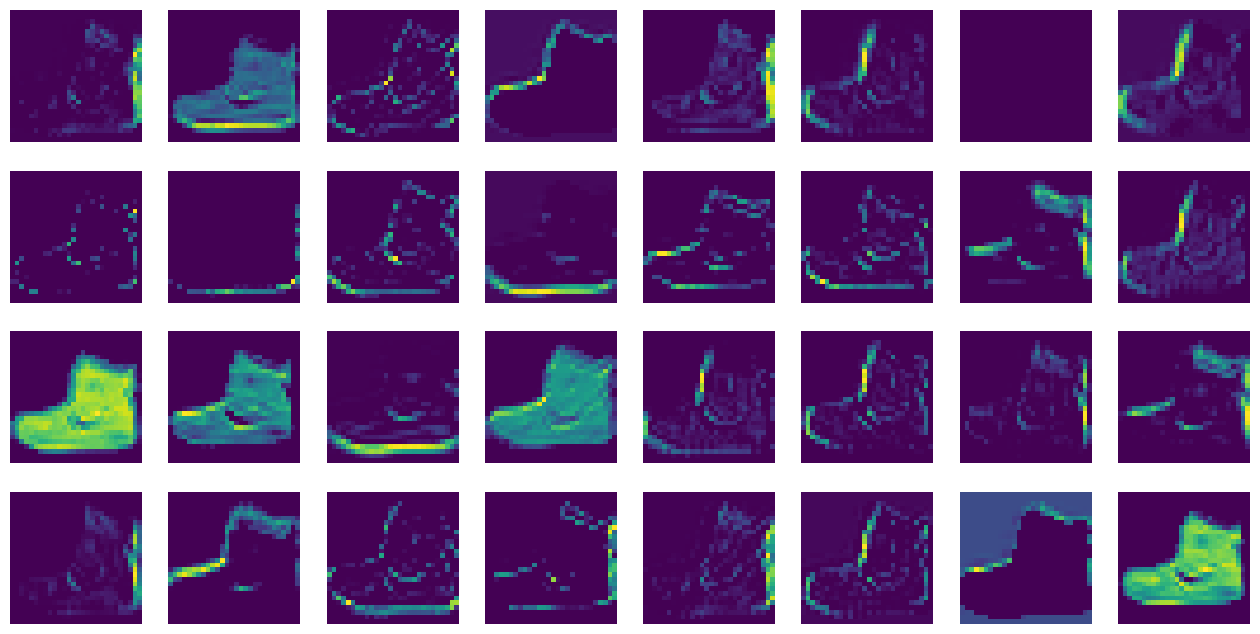

In [41]:
_, axs = plt.subplots(4, 8, figsize=(16, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')
plt.show()

In [42]:
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [43]:
# 두 번째 Conv 통과한 특성맵 시각화
conv_fm2 = keras.Model(model.inputs[0], model.layers[2].output)
conv_fm2.layers

[<InputLayer name=input_layer_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>]

In [44]:
feature_maps = conv_fm2.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [45]:
feature_maps.shape

(1, 14, 14, 64)

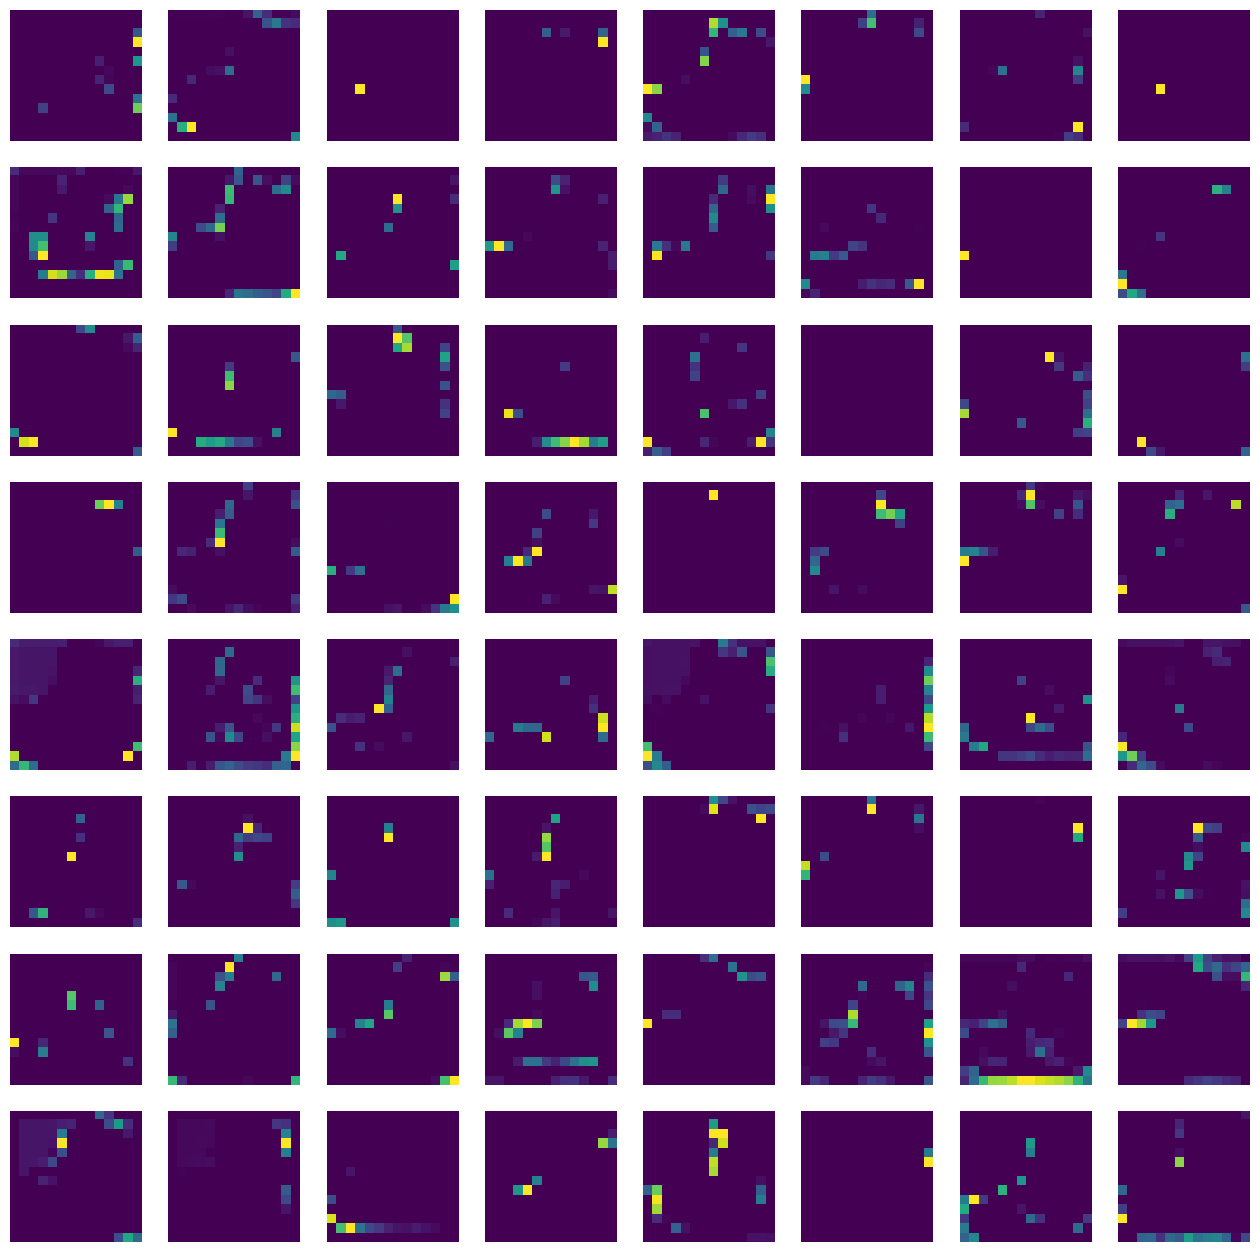

In [46]:
_, axs = plt.subplots(8, 8, figsize=(16, 16))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')
plt.show()